# Entendiendo nuestros datos

In [ ]:
# import libraries
import pandas as pd
from optimus import Optimus
op = Optimus()

In [ ]:
# Read the data
# Data from http://rpubs.com/rhuebner/HRCodebook-13
df = op.read.csv("data/hr-data.csv", header=True)

In [26]:
# See the data
df.table()

Employee_Name 1 (string) nullable,EmpID 2 (string) nullable,MarriedID 3 (string) nullable,MaritalStatusID 4 (string) nullable,GenderID 5 (string) nullable,EmpStatusID 6 (string) nullable,DeptID 7 (string) nullable,PerfScoreID 8 (string) nullable,FromDiversityJobFairID 9 (string) nullable,PayRate 10 (string) nullable,Termd 11 (string) nullable,PositionID 12 (string) nullable,Position 13 (string) nullable,State 14 (string) nullable,Zip 15 (string) nullable,DOB 16 (string) nullable,Sex 17 (string) nullable,MaritalDesc 18 (string) nullable,CitizenDesc 19 (string) nullable,HispanicLatino 20 (string) nullable,RaceDesc 21 (string) nullable,DateofHire 22 (string) nullable,DateofTermination 23 (string) nullable,TermReason 24 (string) nullable,EmploymentStatus 25 (string) nullable,Department 26 (string) nullable,ManagerName 27 (string) nullable,ManagerID 28 (string) nullable,RecruitmentSource 29 (string) nullable,PerformanceScore 30 (string) nullable,EngagementSurvey 31 (string) nullable,EmpSatisfaction 32 (string) nullable,SpecialProjectsCount 33 (string) nullable,LastPerformanceReview_Date 34 (string) nullable,DaysLateLast30 35 (string) nullable,Age 36 (float) nullable
"Brown,⋅Mia",1103024456,1,1,0,1,1,3,1,28.50,0,1,Accountant⋅I,MA,01450,11/24/87,F,Married,US⋅Citizen,No,Black⋅or⋅African⋅American,10/27/2008,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,2.04,2,6,1/15/2019,0,32.779598236083984
"LaRotonda,⋅William⋅⋅",1106026572,0,2,1,1,1,3,0,23.00,0,1,Accountant⋅I,MA,01460,04/26/84,M⋅,Divorced,US⋅Citizen,No,Black⋅or⋅African⋅American,1/6/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.00,4,4,1/17/2019,0,35.774200439453125
"Steans,⋅Tyrone⋅⋅",1302053333,0,0,1,1,1,3,0,29.00,0,1,Accountant⋅I,MA,02703,09/01/86,M⋅,Single,US⋅Citizen,No,White,9/29/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Internet⋅Search,Fully⋅Meets,3.90,5,5,1/18/2019,0,33.841400146484375
"Howard,⋅Estelle",1211050782,1,1,0,1,1,3,0,21.50,1,2,Administrative⋅Assistant,MA,02170,09/16/85,F,Married,US⋅Citizen,No,White,2/16/2015,04/15/15,None,Terminated⋅for⋅Cause,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.24,3,4,None,None,34.80110168457031
"Singh,⋅Nan⋅",1307059817,0,0,0,1,1,3,0,16.56,0,2,Administrative⋅Assistant,MA,02330,05/19/88,F,Single,US⋅Citizen,No,White,5/1/2015,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.00,3,5,1/15/2019,0,31.792999267578125
"Smith,⋅Leigh⋅Ann",711007713,1,1,0,5,1,3,1,20.50,1,2,Administrative⋅Assistant,MA,01844,06/14/87,F,Married,US⋅Citizen,No,Asian,9/26/2011,09/25/13,career⋅change,Voluntarily⋅Terminated,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,3.80,4,4,None,None,32.80649948120117
"Bunbury,⋅Jessica",1504073368,1,1,0,5,6,3,0,55.00,1,3,Area⋅Sales⋅Manager,VA,21851,06/01/64,F,Married,Eligible⋅NonCitizen,No,Black⋅or⋅African⋅American,8/15/2011,08/02/14,Another⋅position,Voluntarily⋅Terminated,Sales,John⋅Smith,17,Social⋅Networks⋅-⋅Facebook⋅Twitter⋅etc,Fully⋅Meets,3.14,5,0,None,None,55.841400146484375
"Carter,⋅Michelle⋅",1403065721,0,0,0,1,6,3,0,55.00,0,3,Area⋅Sales⋅Manager,VT,05664,05/15/63,F,Single,US⋅Citizen,No,White,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Billboard,Fully⋅Meets,5.00,5,0,1/21/2019,0,56.80379867553711
"Dietrich,⋅Jenna⋅⋅",1408069481,0,0,0,1,6,1,0,55.00,0,3,Area⋅Sales⋅Manager,WA,98052,05/14/87,F,Single,US⋅Citizen,Yes,White,2/20/2012,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Website⋅Banner⋅Ads,PIP,2.30,1,0,1/29/2019,0,32.80649948120117
"Digitale,⋅Alfred",1306059197,1,1,1,1,6,3,0,56.00,0,3,Area⋅Sales⋅Manager,NH,03062,09/14/88,M⋅,Married,US⋅Citizen,No,American⋅Indian⋅or⋅Alaska⋅Native,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.60,5,0,1/30/2019,0,31.806499481201172


In [ ]:
# Número de datos faltantes por columna
from pyspark.sql.functions import when, count, col, isnull

df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).table()

In [5]:
df = df.dropna(how="all")

In [6]:
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).table()

In [56]:
df.printSchema()

root
 |-- Employee_Name: string (nullable = true)
 |-- EmpID: string (nullable = true)
 |-- MarriedID: string (nullable = true)
 |-- MaritalStatusID: string (nullable = true)
 |-- GenderID: string (nullable = true)
 |-- EmpStatusID: string (nullable = true)
 |-- DeptID: string (nullable = true)
 |-- PerfScoreID: string (nullable = true)
 |-- FromDiversityJobFairID: string (nullable = true)
 |-- PayRate: string (nullable = true)
 |-- Termd: string (nullable = true)
 |-- PositionID: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- MaritalDesc: string (nullable = true)
 |-- CitizenDesc: string (nullable = true)
 |-- HispanicLatino: string (nullable = true)
 |-- RaceDesc: string (nullable = true)
 |-- DateofHire: string (nullable = true)
 |-- DateofTermination: string (nullable = true)
 |-- TermReason: string (nullable = true)
 |

In [65]:
integer_cols = ["MaritalStatusID", "EmpStatusID", "DeptID", "PerfScoreID", "PositionID", "Termd", "ManagerID", 
                "EmpSatisfaction", "SpecialProjectsCount", "DaysLateLast30"]

In [66]:
for col_name in integer_cols:
    df = df.withColumn(col_name, col(col_name).cast('int'))

In [67]:
float_cols = ["PayRate", "EngagementSurvey"]

In [68]:
for col_name in float_cols:
    df = df.withColumn(col_name, col(col_name).cast('float'))

In [69]:
df.printSchema()

root
 |-- Employee_Name: string (nullable = true)
 |-- EmpID: string (nullable = true)
 |-- MarriedID: string (nullable = true)
 |-- MaritalStatusID: integer (nullable = true)
 |-- GenderID: string (nullable = true)
 |-- EmpStatusID: integer (nullable = true)
 |-- DeptID: integer (nullable = true)
 |-- PerfScoreID: integer (nullable = true)
 |-- FromDiversityJobFairID: string (nullable = true)
 |-- PayRate: float (nullable = true)
 |-- Termd: integer (nullable = true)
 |-- PositionID: integer (nullable = true)
 |-- Position: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Zip: string (nullable = true)
 |-- DOB: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- MaritalDesc: string (nullable = true)
 |-- CitizenDesc: string (nullable = true)
 |-- HispanicLatino: string (nullable = true)
 |-- RaceDesc: string (nullable = true)
 |-- DateofHire: string (nullable = true)
 |-- DateofTermination: string (nullable = true)
 |-- TermReason: string (nullable = tru

## Demográficos 

In [70]:
# Número de empleados
df.count()

310

In [71]:
df.cols.years_between?

In [72]:
# Get age
df = df.cols.years_between("DOB", date_format="mm/dd/yy",output_cols="Age")

In [73]:
# For plots let's use pandas
df_pd = df.toPandas()

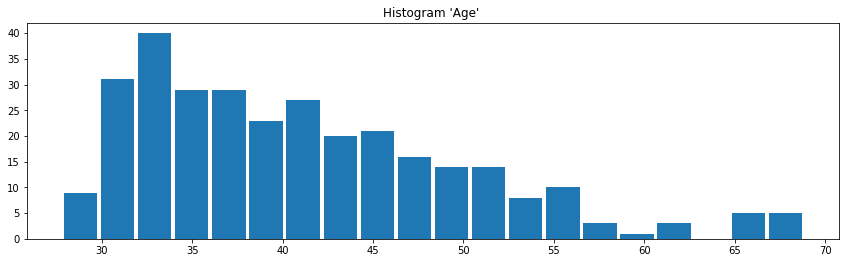

In [74]:
df.plot.hist("Age", buckets=20)

In [75]:
# Using plotly
# hist
import plotly.express as px
px.histogram(df_pd, "Age", nbins=100)

In [76]:
# Gender
px.histogram(df_pd, x="Sex")

In [77]:
# Estado civil
px.histogram(df_pd, x="MaritalDesc")

In [78]:
# Raza
px.histogram(df_pd, x="RaceDesc")

## Información sobre empleo

In [79]:
# Departamento
px.histogram(df_pd, "Department")

In [80]:
# Fuente de empleo
px.histogram(df_pd, "RecruitmentSource")

In [81]:
# Satisfacción
px.histogram(df_pd, "EmpSatisfaction", nbins=10)

In [82]:
# Proyectos especiales
px.histogram(df_pd, "SpecialProjectsCount", nbins=10)

In [83]:
# Performance 
px.histogram(df_pd, "PerformanceScore")

## Relaciones

In [84]:
df.table()

Employee_Name 1 (string) nullable,EmpID 2 (string) nullable,MarriedID 3 (string) nullable,MaritalStatusID 4 (int) nullable,GenderID 5 (string) nullable,EmpStatusID 6 (int) nullable,DeptID 7 (int) nullable,PerfScoreID 8 (int) nullable,FromDiversityJobFairID 9 (string) nullable,PayRate 10 (float) nullable,Termd 11 (int) nullable,PositionID 12 (int) nullable,Position 13 (string) nullable,State 14 (string) nullable,Zip 15 (string) nullable,DOB 16 (string) nullable,Sex 17 (string) nullable,MaritalDesc 18 (string) nullable,CitizenDesc 19 (string) nullable,HispanicLatino 20 (string) nullable,RaceDesc 21 (string) nullable,DateofHire 22 (string) nullable,DateofTermination 23 (string) nullable,TermReason 24 (string) nullable,EmploymentStatus 25 (string) nullable,Department 26 (string) nullable,ManagerName 27 (string) nullable,ManagerID 28 (int) nullable,RecruitmentSource 29 (string) nullable,PerformanceScore 30 (string) nullable,EngagementSurvey 31 (float) nullable,EmpSatisfaction 32 (int) nullable,SpecialProjectsCount 33 (int) nullable,LastPerformanceReview_Date 34 (string) nullable,DaysLateLast30 35 (int) nullable,Age 36 (float) nullable
"Brown,⋅Mia",1103024456,1,1,0,1,1,3,1,28.5,0,1,Accountant⋅I,MA,01450,11/24/87,F,Married,US⋅Citizen,No,Black⋅or⋅African⋅American,10/27/2008,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,2.0399999618530273,2,6,1/15/2019,0,32.779598236083984
"LaRotonda,⋅William⋅⋅",1106026572,0,2,1,1,1,3,0,23.0,0,1,Accountant⋅I,MA,01460,04/26/84,M⋅,Divorced,US⋅Citizen,No,Black⋅or⋅African⋅American,1/6/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.0,4,4,1/17/2019,0,35.774200439453125
"Steans,⋅Tyrone⋅⋅",1302053333,0,0,1,1,1,3,0,29.0,0,1,Accountant⋅I,MA,02703,09/01/86,M⋅,Single,US⋅Citizen,No,White,9/29/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Internet⋅Search,Fully⋅Meets,3.9000000953674316,5,5,1/18/2019,0,33.841400146484375
"Howard,⋅Estelle",1211050782,1,1,0,1,1,3,0,21.5,1,2,Administrative⋅Assistant,MA,02170,09/16/85,F,Married,US⋅Citizen,No,White,2/16/2015,04/15/15,None,Terminated⋅for⋅Cause,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.240000009536743,3,4,None,None,34.80110168457031
"Singh,⋅Nan⋅",1307059817,0,0,0,1,1,3,0,16.559999465942383,0,2,Administrative⋅Assistant,MA,02330,05/19/88,F,Single,US⋅Citizen,No,White,5/1/2015,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.0,3,5,1/15/2019,0,31.792999267578125
"Smith,⋅Leigh⋅Ann",711007713,1,1,0,5,1,3,1,20.5,1,2,Administrative⋅Assistant,MA,01844,06/14/87,F,Married,US⋅Citizen,No,Asian,9/26/2011,09/25/13,career⋅change,Voluntarily⋅Terminated,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,3.799999952316284,4,4,None,None,32.80649948120117
"Bunbury,⋅Jessica",1504073368,1,1,0,5,6,3,0,55.0,1,3,Area⋅Sales⋅Manager,VA,21851,06/01/64,F,Married,Eligible⋅NonCitizen,No,Black⋅or⋅African⋅American,8/15/2011,08/02/14,Another⋅position,Voluntarily⋅Terminated,Sales,John⋅Smith,17,Social⋅Networks⋅-⋅Facebook⋅Twitter⋅etc,Fully⋅Meets,3.140000104904175,5,0,None,None,55.841400146484375
"Carter,⋅Michelle⋅",1403065721,0,0,0,1,6,3,0,55.0,0,3,Area⋅Sales⋅Manager,VT,05664,05/15/63,F,Single,US⋅Citizen,No,White,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Billboard,Fully⋅Meets,5.0,5,0,1/21/2019,0,56.80379867553711
"Dietrich,⋅Jenna⋅⋅",1408069481,0,0,0,1,6,1,0,55.0,0,3,Area⋅Sales⋅Manager,WA,98052,05/14/87,F,Single,US⋅Citizen,Yes,White,2/20/2012,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Website⋅Banner⋅Ads,PIP,2.299999952316284,1,0,1/29/2019,0,32.80649948120117
"Digitale,⋅Alfred",1306059197,1,1,1,1,6,3,0,56.0,0,3,Area⋅Sales⋅Manager,NH,03062,09/14/88,M⋅,Married,US⋅Citizen,No,American⋅Indian⋅or⋅Alaska⋅Native,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.5999999046325684,5,0,1/30/2019,0,31.806499481201172

In [85]:
px.histogram(df_pd, x="Department", color="Termd", barmode="group")

In [86]:
px.histogram(df_pd, x="MaritalDesc", color="Termd", barmode="group")

In [87]:
px.histogram(df_pd, x="RecruitmentSource", color="Termd", barmode="group")

In [88]:
px.histogram(df_pd, x="Age", color="Termd", barmode="group")

In [89]:
px.histogram(df_pd, x="PayRate", color="Termd", barmode="group")

In [90]:
px.scatter(df_pd, x="PayRate", y="EmpSatisfaction")

In [91]:
px.histogram(df_pd, "PerformanceScore", color="Termd", barmode="group")

In [103]:
px.scatter(df_pd, x="PayRate", y="Age")

In [110]:
px.bar(df_pd, x="ManagerName", y="PerformanceScore", color="PerformanceScore")

## Información departamental

In [92]:
df.table()

Employee_Name 1 (string) nullable,EmpID 2 (string) nullable,MarriedID 3 (string) nullable,MaritalStatusID 4 (int) nullable,GenderID 5 (string) nullable,EmpStatusID 6 (int) nullable,DeptID 7 (int) nullable,PerfScoreID 8 (int) nullable,FromDiversityJobFairID 9 (string) nullable,PayRate 10 (float) nullable,Termd 11 (int) nullable,PositionID 12 (int) nullable,Position 13 (string) nullable,State 14 (string) nullable,Zip 15 (string) nullable,DOB 16 (string) nullable,Sex 17 (string) nullable,MaritalDesc 18 (string) nullable,CitizenDesc 19 (string) nullable,HispanicLatino 20 (string) nullable,RaceDesc 21 (string) nullable,DateofHire 22 (string) nullable,DateofTermination 23 (string) nullable,TermReason 24 (string) nullable,EmploymentStatus 25 (string) nullable,Department 26 (string) nullable,ManagerName 27 (string) nullable,ManagerID 28 (int) nullable,RecruitmentSource 29 (string) nullable,PerformanceScore 30 (string) nullable,EngagementSurvey 31 (float) nullable,EmpSatisfaction 32 (int) nullable,SpecialProjectsCount 33 (int) nullable,LastPerformanceReview_Date 34 (string) nullable,DaysLateLast30 35 (int) nullable,Age 36 (float) nullable
"Brown,⋅Mia",1103024456,1,1,0,1,1,3,1,28.5,0,1,Accountant⋅I,MA,01450,11/24/87,F,Married,US⋅Citizen,No,Black⋅or⋅African⋅American,10/27/2008,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,2.0399999618530273,2,6,1/15/2019,0,32.779598236083984
"LaRotonda,⋅William⋅⋅",1106026572,0,2,1,1,1,3,0,23.0,0,1,Accountant⋅I,MA,01460,04/26/84,M⋅,Divorced,US⋅Citizen,No,Black⋅or⋅African⋅American,1/6/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.0,4,4,1/17/2019,0,35.774200439453125
"Steans,⋅Tyrone⋅⋅",1302053333,0,0,1,1,1,3,0,29.0,0,1,Accountant⋅I,MA,02703,09/01/86,M⋅,Single,US⋅Citizen,No,White,9/29/2014,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Internet⋅Search,Fully⋅Meets,3.9000000953674316,5,5,1/18/2019,0,33.841400146484375
"Howard,⋅Estelle",1211050782,1,1,0,1,1,3,0,21.5,1,2,Administrative⋅Assistant,MA,02170,09/16/85,F,Married,US⋅Citizen,No,White,2/16/2015,04/15/15,None,Terminated⋅for⋅Cause,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.240000009536743,3,4,None,None,34.80110168457031
"Singh,⋅Nan⋅",1307059817,0,0,0,1,1,3,0,16.559999465942383,0,2,Administrative⋅Assistant,MA,02330,05/19/88,F,Single,US⋅Citizen,No,White,5/1/2015,None,N/A⋅-⋅still⋅employed,Active,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Website⋅Banner⋅Ads,Fully⋅Meets,5.0,3,5,1/15/2019,0,31.792999267578125
"Smith,⋅Leigh⋅Ann",711007713,1,1,0,5,1,3,1,20.5,1,2,Administrative⋅Assistant,MA,01844,06/14/87,F,Married,US⋅Citizen,No,Asian,9/26/2011,09/25/13,career⋅change,Voluntarily⋅Terminated,Admin⋅Offices,Brandon⋅R.⋅LeBlanc,1,Diversity⋅Job⋅Fair,Fully⋅Meets,3.799999952316284,4,4,None,None,32.80649948120117
"Bunbury,⋅Jessica",1504073368,1,1,0,5,6,3,0,55.0,1,3,Area⋅Sales⋅Manager,VA,21851,06/01/64,F,Married,Eligible⋅NonCitizen,No,Black⋅or⋅African⋅American,8/15/2011,08/02/14,Another⋅position,Voluntarily⋅Terminated,Sales,John⋅Smith,17,Social⋅Networks⋅-⋅Facebook⋅Twitter⋅etc,Fully⋅Meets,3.140000104904175,5,0,None,None,55.841400146484375
"Carter,⋅Michelle⋅",1403065721,0,0,0,1,6,3,0,55.0,0,3,Area⋅Sales⋅Manager,VT,05664,05/15/63,F,Single,US⋅Citizen,No,White,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Billboard,Fully⋅Meets,5.0,5,0,1/21/2019,0,56.80379867553711
"Dietrich,⋅Jenna⋅⋅",1408069481,0,0,0,1,6,1,0,55.0,0,3,Area⋅Sales⋅Manager,WA,98052,05/14/87,F,Single,US⋅Citizen,Yes,White,2/20/2012,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Website⋅Banner⋅Ads,PIP,2.299999952316284,1,0,1/29/2019,0,32.80649948120117
"Digitale,⋅Alfred",1306059197,1,1,1,1,6,3,0,56.0,0,3,Area⋅Sales⋅Manager,NH,03062,09/14/88,M⋅,Married,US⋅Citizen,No,American⋅Indian⋅or⋅Alaska⋅Native,8/18/2014,None,N/A⋅-⋅still⋅employed,Active,Sales,John⋅Smith,17,Pay⋅Per⋅Click⋅-⋅Google,Fully⋅Meets,3.5999999046325684,5,0,1/30/2019,0,31.806499481201172

In [93]:
# Cuántos empleados por departamento
df.groupby("Department").count().table()

Department 1 (string) nullable,count 2 (bigint) not nullable
Sales,31
Production⋅⋅⋅⋅⋅⋅⋅,208
Admin⋅Offices,10
Executive⋅Office,1
Software⋅Engineering,10
IT/IS,50


In [94]:
# Salario promedio por departamento
df.groupby("Department").avg("PayRate").table()

Department 1 (string) nullable,avg(PayRate) 2 (double) nullable
Sales,55.524193548387096
Production⋅⋅⋅⋅⋅⋅⋅,23.08629807600608
Admin⋅Offices,31.896000099182128
Executive⋅Office,80.0
Software⋅Engineering,48.664999389648436
IT/IS,45.789599914550784


In [95]:
# Edad promedio por departamento
df.groupby("Department").avg("Age").table()

Department 1 (string) nullable,avg(Age) 2 (double) nullable
Sales,41.416931952199626
Production⋅⋅⋅⋅⋅⋅⋅,41.76416622675382
Admin⋅Offices,34.707540130615236
Executive⋅Office,65.78759765625
Software⋅Engineering,38.20591926574707
IT/IS,40.38795417785644


In [98]:
# Sexo por departamento
px.histogram(df_pd,x="Sex", color="Department")

In [102]:
# Activos por departamento
px.histogram(df_pd,x="Department", color="Termd")